In [1]:
## Standard Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
## Importing the OS and JSON Modules
import os,json
from warnings import simplefilter
simplefilter(action="ignore", category=pd.errors.PerformanceWarning)



# Data

In [2]:
info_df = pd.read_csv('Data/superhero_info - superhero_info.csv')
powers_df = pd.read_csv('Data/superhero_powers - superhero_powers.csv')

# Power Cleaning

In [3]:
powers_df.head()

,hero_names,Powers
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed"
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super..."
2,Abe Sapien,"Agility,Accelerated Healing,Cold Resistance,Du..."
3,Abin Sur,Lantern Power Ring
4,Abomination,"Accelerated Healing,Intelligence,Super Strengt..."


In [4]:
powers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hero_names  667 non-null    object
 1   Powers      667 non-null    object
dtypes: object(2)
memory usage: 10.5+ KB


In [5]:
powers_df.duplicated().sum()

0

In [6]:
powers_df['hero_names'].head(20)

0              3-D Man
1               A-Bomb
2           Abe Sapien
3             Abin Sur
4          Abomination
5              Abraxas
6        Absorbing Man
7          Adam Monroe
8         Adam Strange
9            Agent Bob
10          Agent Zero
11          Air-Walker
12                Ajax
13          Alan Scott
14         Alex Mercer
15        Alex Woolsly
16               Alien
17    Allan Quatermain
18               Amazo
19                Ammo
Name: hero_names, dtype: object

In [7]:
powers_df.loc[0,'Powers']

'Agility,Super Strength,Stamina,Super Speed'

In [8]:
# splitting powers into columns to create a cleaner list
powers_df['Powers_split'] = powers_df['Powers'].str.split(',',expand =False)

In [9]:
#save columns into the dataframe
powers_df[['Powers']]

,Powers
0,"Agility,Super Strength,Stamina,Super Speed"
1,"Accelerated Healing,Durability,Longevity,Super..."
2,"Agility,Accelerated Healing,Cold Resistance,Du..."
3,Lantern Power Ring
4,"Accelerated Healing,Intelligence,Super Strengt..."
...,...
662,"Flight,Energy Blasts,Size Changing"
663,"Cold Resistance,Durability,Longevity,Super Str..."
664,"Agility,Stealth,Danger Sense,Marksmanship,Weap..."
665,"Cryokinesis,Telepathy,Magic,Fire Control,Proba..."


In [10]:
## exploding the column of lists
exploded = powers_df.explode('Powers_split')

exploded

,hero_names,Powers,Powers_split
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed",Agility
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed",Super Strength
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed",Stamina
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed",Super Speed
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super...",Accelerated Healing
...,...,...,...
665,Zatanna,"Cryokinesis,Telepathy,Magic,Fire Control,Proba...",Weather Control
666,Zoom,"Super Speed,Intangibility,Time Travel,Time Man...",Super Speed
666,Zoom,"Super Speed,Intangibility,Time Travel,Time Man...",Intangibility
666,Zoom,"Super Speed,Intangibility,Time Travel,Time Man...",Time Travel


In [11]:
# creating columns to explode into
cols = exploded['Powers_split'].dropna().unique()
cols

array(['Agility', 'Super Strength', 'Stamina', 'Super Speed',
       'Accelerated Healing', 'Durability', 'Longevity', 'Camouflage',
       'Self-Sustenance', 'Cold Resistance', 'Underwater breathing',
       'Marksmanship', 'Weapons Master', 'Intelligence', 'Telepathy',
       'Immortality', 'Reflexes', 'Enhanced Sight', 'Sub-Mariner',
       'Lantern Power Ring', 'Invulnerability', 'Animation',
       'Super Breath', 'Dimensional Awareness', 'Flight', 'Size Changing',
       'Teleportation', 'Magic', 'Dimensional Travel',
       'Molecular Manipulation', 'Energy Manipulation', 'Power Cosmic',
       'Energy Absorption', 'Elemental Transmogrification',
       'Fire Resistance', 'Natural Armor', 'Heat Resistance',
       'Matter Absorption', 'Regeneration', 'Stealth', 'Power Suit',
       'Energy Blasts', 'Energy Beams', 'Heat Generation', 'Danger Sense',
       'Phasing', 'Force Fields', 'Hypnokinesis', 'Invisibility',
       'Enhanced Senses', 'Jump', 'Shapeshifting', 'Elasticity',
 

In [12]:
# loop through cols to one hot encode powers
for unique_power in cols:
    powers_df[unique_power] = powers_df['Powers'].str.contains(unique_power)
powers_df.head()

,hero_names,Powers,Powers_split,Agility,Super Strength,Stamina,Super Speed,Accelerated Healing,Durability,Longevity,...,Weather Control,Omnipresent,Omniscient,Hair Manipulation,Nova Force,Odin Force,Phoenix Force,Intuitive aptitude,Melting,Changing Armor
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed","[Agility, Super Strength, Stamina, Super Speed]",True,True,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super...","[Accelerated Healing, Durability, Longevity, S...",False,True,True,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,"Agility,Accelerated Healing,Cold Resistance,Du...","[Agility, Accelerated Healing, Cold Resistance...",True,True,True,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,Lantern Power Ring,[Lantern Power Ring],False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,"Accelerated Healing,Intelligence,Super Strengt...","[Accelerated Healing, Intelligence, Super Stre...",False,True,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [13]:
#drop orignal powers column and powers split column
powers_df = powers_df.drop(columns = ['Powers','Powers_split'])
powers_df.head(5)

,hero_names,Agility,Super Strength,Stamina,Super Speed,Accelerated Healing,Durability,Longevity,Camouflage,Self-Sustenance,...,Weather Control,Omnipresent,Omniscient,Hair Manipulation,Nova Force,Odin Force,Phoenix Force,Intuitive aptitude,Melting,Changing Armor
0,3-D Man,True,True,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,True,False,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,True,False,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [14]:
powers_df = powers_df.rename(columns = {'hero_names':'Hero'})
powers_df.head()

,Hero,Agility,Super Strength,Stamina,Super Speed,Accelerated Healing,Durability,Longevity,Camouflage,Self-Sustenance,...,Weather Control,Omnipresent,Omniscient,Hair Manipulation,Nova Force,Odin Force,Phoenix Force,Intuitive aptitude,Melting,Changing Armor
0,3-D Man,True,True,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,True,False,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,True,False,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# Info Cleaning


In [15]:
info_df.head()

,Hero|Publisher,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements
0,A-Bomb|Marvel Comics,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}"
1,Abe Sapien|Dark Horse Comics,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}"
2,Abin Sur|DC Comics,Male,Ungaran,good,No Hair,blue,red,"{'Height': '185.0 cm', 'Weight': '90.0 kg'}"
3,Abomination|Marvel Comics,Male,Human / Radiation,bad,No Hair,green,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}"
4,Absorbing Man|Marvel Comics,Male,Human,bad,No Hair,blue,Unknown,"{'Height': '193.0 cm', 'Weight': '122.0 kg'}"


In [16]:
info_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Hero|Publisher  463 non-null    object
 1   Gender          463 non-null    object
 2   Race            463 non-null    object
 3   Alignment       463 non-null    object
 4   Hair color      463 non-null    object
 5   Eye color       463 non-null    object
 6   Skin color      463 non-null    object
 7   Measurements    463 non-null    object
dtypes: object(8)
memory usage: 29.1+ KB


In [17]:
info_df.duplicated().sum()

0

In [18]:
info_df.nunique()

Hero|Publisher    457
Gender              3
Race               52
Alignment           4
Hair color         29
Eye color          21
Skin color         14
Measurements      287
dtype: int64

In [19]:
info_df['Hero|Publisher'].head()

0            A-Bomb|Marvel Comics
1    Abe Sapien|Dark Horse Comics
2              Abin Sur|DC Comics
3       Abomination|Marvel Comics
4     Absorbing Man|Marvel Comics
Name: Hero|Publisher, dtype: object

In [20]:
# I'm going to split this into two columns, hero and publisher
info_df['Hero|Publisher'].str.split('|',expand=True)

,0,1
0,A-Bomb,Marvel Comics
1,Abe Sapien,Dark Horse Comics
2,Abin Sur,DC Comics
3,Abomination,Marvel Comics
4,Absorbing Man,Marvel Comics
...,...,...
458,Yellowjacket,Marvel Comics
459,Yellowjacket II,Marvel Comics
460,Yoda,George Lucas
461,Zatanna,DC Comics


In [21]:
## save the 2 new columns into the dataframe
info_df[['Hero','Publisher']] = info_df['Hero|Publisher'].str.split('|',expand=True)
info_df.head(2)


,Hero|Publisher,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements,Hero,Publisher
0,A-Bomb|Marvel Comics,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",A-Bomb,Marvel Comics
1,Abe Sapien|Dark Horse Comics,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}",Abe Sapien,Dark Horse Comics


In [22]:
#dropping original column
info_df = info_df.drop(columns=['Hero|Publisher'])
info_df.head(2)

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements,Hero,Publisher
0,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",A-Bomb,Marvel Comics
1,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}",Abe Sapien,Dark Horse Comics


In [23]:
#checking gender column values
info_df['Gender'].value_counts()

Male       321
Female     134
Unknown      8
Name: Gender, dtype: int64

In [24]:
#checking race column
info_df['Race'].value_counts()

Human                156
Unknown              145
Mutant                51
Human / Radiation     11
Android                7
Symbiote               7
Alien                  6
Demon                  6
Cyborg                 6
Kryptonian             5
Atlantean              5
Asgardian              5
Inhuman                4
New God                3
Human-Kree             2
Eternal                2
Demi-God               2
Saiyan                 2
Amazon                 2
Human / Altered        2
Metahuman              2
God / Eternal          2
Human-Vulcan           1
Martian                1
Zombie                 1
Korugaran              1
Talokite               1
Clone                  1
Human-Spartoi          1
Animal                 1
Yautja                 1
Human / Cosmic         1
Tamaranean             1
Mutant / Clone         1
Luphomoid              1
Frost Giant            1
Strontian              1
Czarnian               1
Bolovaxian             1
Human-Vuldarian        1


In [25]:
# checking alignments
info_df['Alignment'].value_counts()

good       311
bad        132
neutral     17
Unknown      3
Name: Alignment, dtype: int64

In [26]:
#checking Hair Color
info_df['Hair color'].value_counts()

Black               127
Blond                74
Brown                69
No Hair              52
Red                  41
White                22
Unknown              18
Auburn               13
Green                 6
Strawberry Blond      5
Purple                4
Brown / White         4
Grey                  4
black                 3
blond                 3
Silver                3
Blue                  2
Orange                2
Pink                  1
Gold                  1
Red / White           1
Indigo                1
Red / Orange          1
Red / Grey            1
Brownn                1
Yellow                1
Orange / White        1
Magenta               1
Black / Blue          1
Name: Hair color, dtype: int64

In [27]:
# renaming black and blond to Black and Blond

info_df['Hair color']= info_df['Hair color'].replace(['black','blond'] , ['Black','Blond'])

info_df['Hair color'].value_counts()

Black               130
Blond                77
Brown                69
No Hair              52
Red                  41
White                22
Unknown              18
Auburn               13
Green                 6
Strawberry Blond      5
Grey                  4
Purple                4
Brown / White         4
Silver                3
Blue                  2
Orange                2
Brownn                1
Red / White           1
Indigo                1
Red / Orange          1
Gold                  1
Pink                  1
Yellow                1
Orange / White        1
Red / Grey            1
Magenta               1
Black / Blue          1
Name: Hair color, dtype: int64

In [28]:
# checking eye color
info_df['Eye color'].value_counts()

blue                       182
brown                      102
green                       61
red                         38
Unknown                     17
yellow                      13
black                       12
white                       10
grey                         5
hazel                        5
gold                         3
purple                       3
yellow (without irises)      2
amber                        2
violet                       2
white / red                  1
indigo                       1
silver                       1
green / blue                 1
blue / white                 1
yellow / blue                1
Name: Eye color, dtype: int64

In [29]:
# looking for blemishes
info_df['Skin color'].value_counts()

Unknown       409
green          15
blue            7
red             7
white           5
grey            4
silver          4
purple          3
gold            2
pink            2
yellow          2
black           1
blue-white      1
orange          1
Name: Skin color, dtype: int64

In [30]:
# tailoring
info_df['Measurements'].value_counts()


{'Height': '183.0 cm', 'Weight': '90.0 kg'}     6
{'Height': '183.0 cm', 'Weight': '86.0 kg'}     6
{'Height': '178.0 cm', 'Weight': '79.0 kg'}     6
{'Height': '188.0 cm', 'Weight': '95.0 kg'}     6
{'Height': '180.0 cm', 'Weight': '81.0 kg'}     6
                                               ..
{'Height': '701.0 cm', 'Weight': '4.0 kg'}      1
{'Height': '185.0 cm', 'Weight': '89.0 kg'}     1
{'Height': '259.0 cm', 'Weight': '158.0 kg'}    1
{'Height': '191.0 cm', 'Weight': '65.0 kg'}     1
{'Height': '66.0 cm', 'Weight': '17.0 kg'}      1
Name: Measurements, Length: 287, dtype: int64

In [31]:
# removing spacing between cm and kg
replace = [' ','']
# run a loop to replace all of the characters in the list at once
for char in replace:
    info_df['Measurements'] = info_df['Measurements'].str.replace(char,'',regex=False)
info_df['Measurements'].head()

0    {'Height':'203.0cm','Weight':'441.0kg'}
1     {'Height':'191.0cm','Weight':'65.0kg'}
2     {'Height':'185.0cm','Weight':'90.0kg'}
3    {'Height':'203.0cm','Weight':'441.0kg'}
4    {'Height':'193.0cm','Weight':'122.0kg'}
Name: Measurements, dtype: object

In [32]:
# checking type
build = info_df.loc[0,'Measurements']
print(type(build))
build

<class 'str'>


"{'Height':'203.0cm','Weight':'441.0kg'}"

In [33]:
# replacing quotes to something more cooperative for json so it can be
# recognized as a dict 
build = build.replace("'",'"')
build

'{"Height":"203.0cm","Weight":"441.0kg"}'

In [34]:
# fitting on json
adjusted_build = json.loads(build)
print(type(adjusted_build))
adjusted_build

<class 'dict'>


{'Height': '203.0cm', 'Weight': '441.0kg'}

In [35]:
## use .str.replace to replace all single quotes
info_df['Measurements'] = info_df['Measurements'].str.replace("'",'"')
## Apply the json.loads to the full column
info_df['Measurements'] = info_df['Measurements'].apply(json.loads)
info_df['Measurements'].head()



0    {'Height': '203.0cm', 'Weight': '441.0kg'}
1     {'Height': '191.0cm', 'Weight': '65.0kg'}
2     {'Height': '185.0cm', 'Weight': '90.0kg'}
3    {'Height': '203.0cm', 'Weight': '441.0kg'}
4    {'Height': '193.0cm', 'Weight': '122.0kg'}
Name: Measurements, dtype: object

In [36]:
#applying to pandas
body = info_df['Measurements'].apply(pd.Series)
body



,Height,Weight
0,203.0cm,441.0kg
1,191.0cm,65.0kg
2,185.0cm,90.0kg
3,203.0cm,441.0kg
4,193.0cm,122.0kg
...,...,...
458,183.0cm,83.0kg
459,165.0cm,52.0kg
460,66.0cm,17.0kg
461,170.0cm,57.0kg


In [37]:
# concat height and weight with original dataframe
info_df = pd.concat((info_df, body), axis = 1)
info_df.head(2)


,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements,Hero,Publisher,Height,Weight
0,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0cm', 'Weight': '441.0kg'}",A-Bomb,Marvel Comics,203.0cm,441.0kg
1,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0cm', 'Weight': '65.0kg'}",Abe Sapien,Dark Horse Comics,191.0cm,65.0kg


In [38]:
#drop measurments
info_df = info_df.drop(columns =[ 'Measurements'])
info_df.head(2)

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Hero,Publisher,Height,Weight
0,Male,Human,good,No Hair,yellow,Unknown,A-Bomb,Marvel Comics,203.0cm,441.0kg
1,Male,Icthyo Sapien,good,No Hair,blue,blue,Abe Sapien,Dark Horse Comics,191.0cm,65.0kg


In [39]:
# feature engineering for better compatibility
info_df = info_df[['Hero','Publisher','Alignment','Height','Weight','Gender','Race','Hair color', 'Eye color','Skin color']]
info_df.head()

,Hero,Publisher,Alignment,Height,Weight,Gender,Race,Hair color,Eye color,Skin color
0,A-Bomb,Marvel Comics,good,203.0cm,441.0kg,Male,Human,No Hair,yellow,Unknown
1,Abe Sapien,Dark Horse Comics,good,191.0cm,65.0kg,Male,Icthyo Sapien,No Hair,blue,blue
2,Abin Sur,DC Comics,good,185.0cm,90.0kg,Male,Ungaran,No Hair,blue,red
3,Abomination,Marvel Comics,bad,203.0cm,441.0kg,Male,Human / Radiation,No Hair,green,Unknown
4,Absorbing Man,Marvel Comics,bad,193.0cm,122.0kg,Male,Human,No Hair,blue,Unknown


In [40]:
merged = pd.merge(info_df,powers_df, on= 'Hero')
merged

,Hero,Publisher,Alignment,Height,Weight,Gender,Race,Hair color,Eye color,Skin color,...,Weather Control,Omnipresent,Omniscient,Hair Manipulation,Nova Force,Odin Force,Phoenix Force,Intuitive aptitude,Melting,Changing Armor
0,A-Bomb,Marvel Comics,good,203.0cm,441.0kg,Male,Human,No Hair,yellow,Unknown,...,False,False,False,False,False,False,False,False,False,False
1,Abe Sapien,Dark Horse Comics,good,191.0cm,65.0kg,Male,Icthyo Sapien,No Hair,blue,blue,...,False,False,False,False,False,False,False,False,False,False
2,Abin Sur,DC Comics,good,185.0cm,90.0kg,Male,Ungaran,No Hair,blue,red,...,False,False,False,False,False,False,False,False,False,False
3,Abomination,Marvel Comics,bad,203.0cm,441.0kg,Male,Human / Radiation,No Hair,green,Unknown,...,False,False,False,False,False,False,False,False,False,False
4,Absorbing Man,Marvel Comics,bad,193.0cm,122.0kg,Male,Human,No Hair,blue,Unknown,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458,Yellowjacket,Marvel Comics,good,183.0cm,83.0kg,Male,Human,Blond,blue,Unknown,...,False,False,False,False,False,False,False,False,False,False
459,Yellowjacket II,Marvel Comics,good,165.0cm,52.0kg,Female,Human,Strawberry Blond,blue,Unknown,...,False,False,False,False,False,False,False,False,False,False
460,Yoda,George Lucas,good,66.0cm,17.0kg,Male,Yoda's species,White,brown,green,...,False,False,False,False,False,False,False,False,False,False
461,Zatanna,DC Comics,good,170.0cm,57.0kg,Female,Human,Black,blue,Unknown,...,True,False,False,False,False,False,False,False,False,False


In [41]:
#concatonate the two df's together
info_powers_df = pd.concat([info_df,powers_df])
info_powers_df

,Hero,Publisher,Alignment,Height,Weight,Gender,Race,Hair color,Eye color,Skin color,...,Weather Control,Omnipresent,Omniscient,Hair Manipulation,Nova Force,Odin Force,Phoenix Force,Intuitive aptitude,Melting,Changing Armor
0,A-Bomb,Marvel Comics,good,203.0cm,441.0kg,Male,Human,No Hair,yellow,Unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Abe Sapien,Dark Horse Comics,good,191.0cm,65.0kg,Male,Icthyo Sapien,No Hair,blue,blue,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Abin Sur,DC Comics,good,185.0cm,90.0kg,Male,Ungaran,No Hair,blue,red,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Abomination,Marvel Comics,bad,203.0cm,441.0kg,Male,Human / Radiation,No Hair,green,Unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Absorbing Man,Marvel Comics,bad,193.0cm,122.0kg,Male,Human,No Hair,blue,Unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,Yellowjacket II,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
663,Ymir,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
664,Yoda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
665,Zatanna,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,True,False,False,False,False,False,False,False,False,False


In [42]:
merged['Height'] = merged['Height'].str.replace('cm','').astype(float) 
merged['Weight'] = merged['Weight'].str.replace('kg','').astype(float)
merged = merged.rename(columns = {'Height':'Height(cm)',
                                                 'Weight':'Weight(kg)'})
merged

,Hero,Publisher,Alignment,Height(cm),Weight(kg),Gender,Race,Hair color,Eye color,Skin color,...,Weather Control,Omnipresent,Omniscient,Hair Manipulation,Nova Force,Odin Force,Phoenix Force,Intuitive aptitude,Melting,Changing Armor
0,A-Bomb,Marvel Comics,good,203.0,441.0,Male,Human,No Hair,yellow,Unknown,...,False,False,False,False,False,False,False,False,False,False
1,Abe Sapien,Dark Horse Comics,good,191.0,65.0,Male,Icthyo Sapien,No Hair,blue,blue,...,False,False,False,False,False,False,False,False,False,False
2,Abin Sur,DC Comics,good,185.0,90.0,Male,Ungaran,No Hair,blue,red,...,False,False,False,False,False,False,False,False,False,False
3,Abomination,Marvel Comics,bad,203.0,441.0,Male,Human / Radiation,No Hair,green,Unknown,...,False,False,False,False,False,False,False,False,False,False
4,Absorbing Man,Marvel Comics,bad,193.0,122.0,Male,Human,No Hair,blue,Unknown,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458,Yellowjacket,Marvel Comics,good,183.0,83.0,Male,Human,Blond,blue,Unknown,...,False,False,False,False,False,False,False,False,False,False
459,Yellowjacket II,Marvel Comics,good,165.0,52.0,Female,Human,Strawberry Blond,blue,Unknown,...,False,False,False,False,False,False,False,False,False,False
460,Yoda,George Lucas,good,66.0,17.0,Male,Yoda's species,White,brown,green,...,False,False,False,False,False,False,False,False,False,False
461,Zatanna,DC Comics,good,170.0,57.0,Female,Human,Black,blue,Unknown,...,True,False,False,False,False,False,False,False,False,False


# Comparing Heroes With Super Speed to Heroes who Don't

Super Speed
False    101.77
True     129.40
Name: Weight(kg), dtype: float64


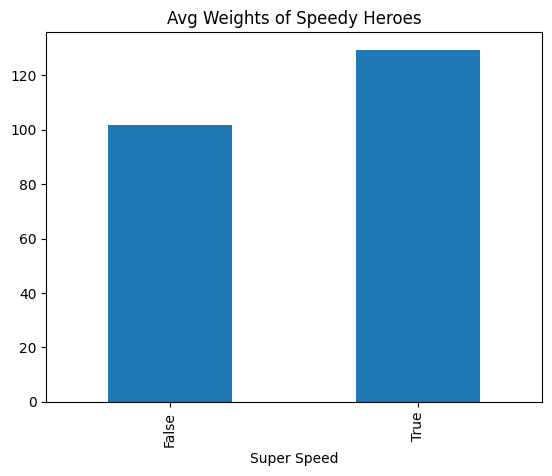

In [43]:
# Creating a groupby compring the two groups and visualizing the data
speedy_heroes = merged.groupby(['Super Speed'])['Weight(kg)'].mean().plot(kind='bar',
                                                                          title= 'Avg Weights of Speedy Heroes');
speedy_heroes
print(merged.groupby('Super Speed')['Weight(kg)'].mean().round(2))

In [44]:
# getting a count of the heroes with super speed vs those who do not
speedy_heroes = merged['Super Speed'] ==True
not_so_speedy_heroes = ~speedy_heroes
print(speedy_heroes.sum())
print(not_so_speedy_heroes.sum())

198
265


In [65]:
# Which heroes have super speed?
merged.loc[merged['Super Speed']== True]


,Hero,Publisher,Alignment,Height(cm),Weight(kg),Gender,Race,Hair color,Eye color,Skin color,...,Weather Control,Omnipresent,Omniscient,Hair Manipulation,Nova Force,Odin Force,Phoenix Force,Intuitive aptitude,Melting,Changing Armor
3,Abomination,Marvel Comics,bad,203.0,441.0,Male,Human / Radiation,No Hair,green,Unknown,...,False,False,False,False,False,False,False,False,False,False
5,Adam Strange,DC Comics,good,185.0,88.0,Male,Human,Blond,blue,Unknown,...,False,False,False,False,False,False,False,False,False,False
8,Air-Walker,Marvel Comics,bad,188.0,108.0,Male,Unknown,White,blue,Unknown,...,False,False,False,False,False,False,False,False,False,False
9,Ajax,Marvel Comics,bad,193.0,90.0,Male,Cyborg,Black,brown,Unknown,...,False,False,False,False,False,False,False,False,False,False
10,Alan Scott,DC Comics,good,180.0,90.0,Male,Unknown,Blond,blue,Unknown,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453,Wonder Girl,DC Comics,good,165.0,51.0,Female,Demi-God,Blond,blue,Unknown,...,False,False,False,False,False,False,False,False,False,False
454,Wonder Man,Marvel Comics,good,188.0,171.0,Male,Unknown,Black,red,Unknown,...,False,False,False,False,False,False,False,False,False,False
455,Wonder Woman,DC Comics,good,183.0,74.0,Female,Amazon,Black,blue,Unknown,...,False,False,False,False,False,False,False,False,False,False
460,Yoda,George Lucas,good,66.0,17.0,Male,Yoda's species,White,brown,green,...,False,False,False,False,False,False,False,False,False,False


# Avg Hero Heights For Each Publisher

Publisher
Image Comics         211.00
Marvel Comics        191.55
DC Comics            181.92
Star Trek            181.50
Team Epic TV         180.75
Unknown              178.00
Dark Horse Comics    176.91
Shueisha             171.50
George Lucas         159.60
Name: Height(cm), dtype: float64


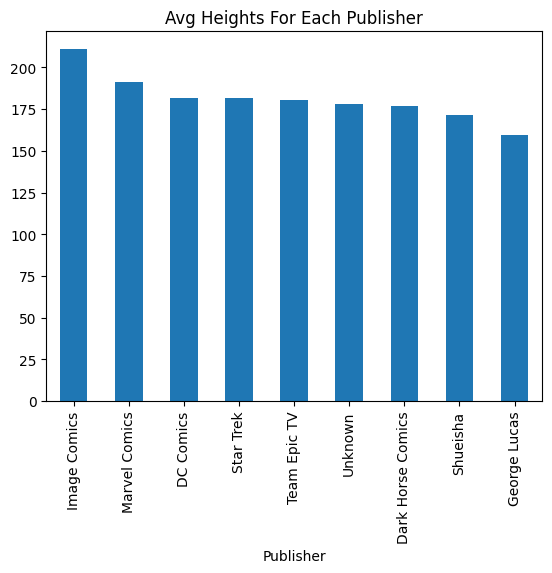

In [46]:
publisher_heights = merged.groupby(['Publisher'])['Height(cm)'].mean().sort_values(ascending =False).\
plot(kind='bar',title= 'Avg Heights For Each Publisher');
publisher_heights
print(merged.groupby('Publisher')['Height(cm)'].mean().sort_values(ascending=False).round(2))

In [67]:
# whos the tallest hero?
merged.loc[merged['Height(cm)']>= 300]

,Hero,Publisher,Alignment,Height(cm),Weight(kg),Gender,Race,Hair color,Eye color,Skin color,...,Weather Control,Omnipresent,Omniscient,Hair Manipulation,Nova Force,Odin Force,Phoenix Force,Intuitive aptitude,Melting,Changing Armor
155,Fin Fang Foom,Marvel Comics,good,975.0,18.0,Male,Kakarantharaian,No Hair,red,green,...,False,False,False,False,False,False,False,False,False,False
168,Galactus,Marvel Comics,neutral,876.0,16.0,Male,Cosmic Entity,Black,black,Unknown,...,False,False,False,False,False,False,False,False,False,False
186,Groot,Marvel Comics,good,701.0,4.0,Male,Flora Colossus,Unknown,yellow,Unknown,...,False,False,False,False,False,False,False,False,False,False
281,MODOK,Marvel Comics,bad,366.0,338.0,Male,Cyborg,Brownn,white,Unknown,...,False,False,False,False,False,False,False,False,False,False
308,Onslaught,Marvel Comics,bad,305.0,405.0,Male,Mutant,No Hair,red,Unknown,...,False,False,False,False,False,False,False,False,False,False
354,Sasquatch,Marvel Comics,good,305.0,900.0,Male,Unknown,Orange,red,Unknown,...,False,False,False,False,False,False,False,False,False,False
451,Wolfsbane,Marvel Comics,good,366.0,473.0,Female,Unknown,Auburn,green,Unknown,...,False,False,False,False,False,False,False,False,False,False
